## Plots of CERES data products for earth's radiation budget


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy


In [2]:
# %matplotlib qt 
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'SPURS1_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='pdf'

In [3]:
savefig = True
zoom = False
if zoom:
    xmin, xmax = (125,290)
    ymin, ymax = (-28,65)
else:
    xmin, xmax = (-180,180)
    ymin, ymax = (-90,90)
    

In [4]:
filename=r'../data/raw/CERES_EBAF_Ed4.1_Subset_CLIM01-CLIM12.nc'
ds = xr.open_dataset(filename)


In [5]:
ds

<xarray.Dataset>
Dimensions:                 (ctime: 12, lat: 180, lon: 360, sc1: 12, sc2: 2)
Coordinates:
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * ctime                   (ctime) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: sc1, sc2
Data variables:
    climatology_bounds      (sc1, sc2) int32 ...
    toa_sw_all_clim         (ctime, lat, lon) float32 ...
    toa_lw_all_clim         (ctime, lat, lon) float32 ...
    toa_net_all_clim        (ctime, lat, lon) float32 ...
    toa_sw_clr_c_clim       (ctime, lat, lon) float32 ...
    toa_lw_clr_c_clim       (ctime, lat, lon) float32 ...
    toa_net_clr_c_clim      (ctime, lat, lon) float32 ...
    toa_sw_clr_t_clim       (ctime, lat, lon) float32 ...
    toa_lw_clr_t_clim       (ctime, lat, lon) float32 ...
    toa_net_clr_t_clim      (ctime, lat, lon) float32 ...
    solar_clim              (ctime, lat, lon) float32 ...
    sfc_sw_down_all_clim    (ctime, lat, lon) float32 ...
    sfc_sw_down_clr_c_clim  (ctime, lat, lon) float32 ...
    sfc_sw_down_clr_t_clim  (ctime, lat, lon) float32 ...
    sfc_sw_up_all_clim      (ctime, lat, lon) float32 ...
    sfc_sw_up_clr_c_clim    (ctime, lat, lon) float32 ...
    sfc_sw_up_clr_t_clim    (ctime, lat, lon) float32 ...
    sfc_lw_down_all_clim    (ctime, lat, lon) float32 ...
    sfc_lw_down_clr_c_clim  (ctime, lat, lon) float32 ...
    sfc_lw_down_clr_t_clim  (ctime, lat, lon) float32 ...
    sfc_lw_up_all_clim      (ctime, lat, lon) float32 ...
    sfc_lw_up_clr_c_clim    (ctime, lat, lon) float32 ...
    sfc_lw_up_clr_t_clim    (ctime, lat, lon) float32 ...
    sfc_net_sw_all_clim     (ctime, lat, lon) float32 ...
    sfc_net_sw_clr_c_clim   (ctime, lat, lon) float32 ...
    sfc_net_sw_clr_t_clim   (ctime, lat, lon) float32 ...
    sfc_net_lw_all_clim     (ctime, lat, lon) float32 ...
    sfc_net_lw_clr_c_clim   (ctime, lat, lon) float32 ...
    sfc_net_lw_clr_t_clim   (ctime, lat, lon) float32 ...
    sfc_net_tot_all_clim    (ctime, lat, lon) float32 ...
    sfc_net_tot_clr_c_clim  (ctime, lat, lon) float32 ...
    sfc_net_tot_clr_t_clim  (ctime, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date June 8, 2021
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF_L3B004.1

C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


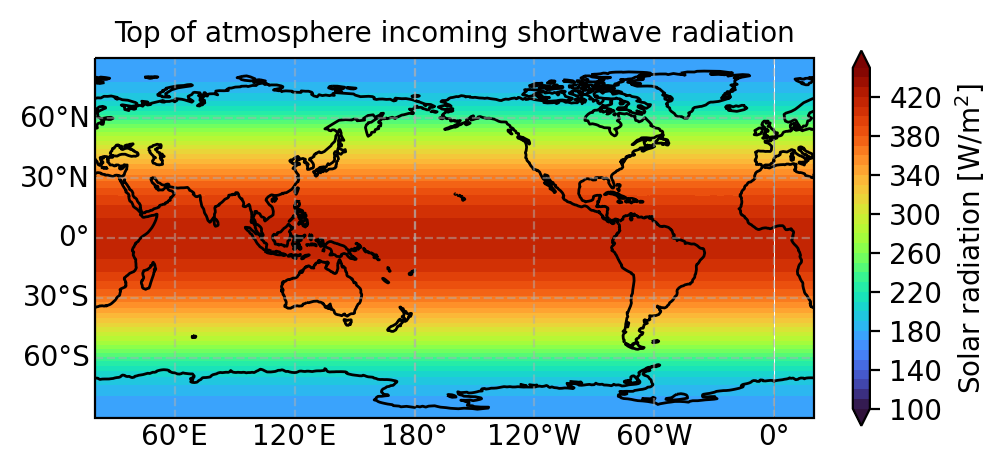

In [6]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Top of atmosphere incoming shortwave radiation',size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor=[.6,.6,.6], edgecolor='black')
levels = np.linspace(100,450,36)
cs = ax.contourf(ds.lon,ds.lat,np.mean(ds.solar_clim,0), levels,  extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022)
cb.set_label('Solar radiation [W/m$^2$]',fontsize = 10)


if savefig:
    plt.savefig(__figdir__+'TOA_SW_radiation_incoming.'+plotfiletype,**savefig_args)


C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


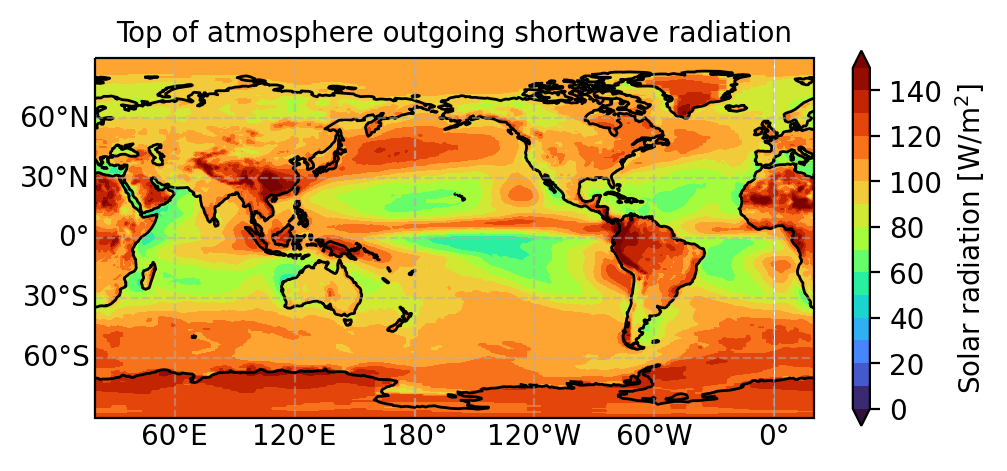

In [7]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Top of atmosphere outgoing shortwave radiation',size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor=[.6,.6,.6], edgecolor='black')
levels = np.linspace(0,150,16)
cs = ax.contourf(ds.lon,ds.lat,np.mean(ds.toa_sw_all_clim,0), levels,  extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022)
cb.set_label('Solar radiation [W/m$^2$]',fontsize = 10)


if savefig:
    plt.savefig(__figdir__+'TOA_SW_radiation_outgoing.'+plotfiletype,**savefig_args)


C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


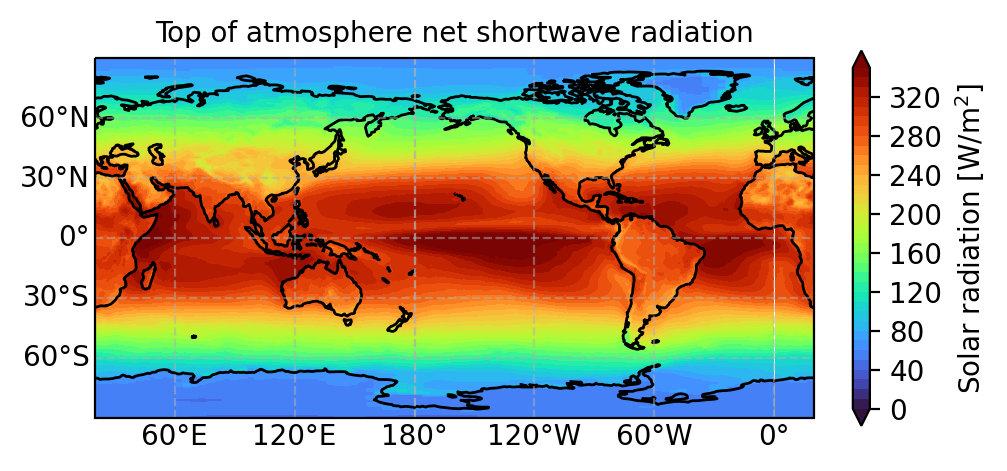

In [8]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Top of atmosphere net shortwave radiation',size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor=[.6,.6,.6], edgecolor='black')
levels = np.linspace(0,350,36)
cs = ax.contourf(ds.lon,ds.lat,np.mean(ds.solar_clim-ds.toa_sw_all_clim,0), levels,  extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022)
cb.set_label('Solar radiation [W/m$^2$]',fontsize = 10)


if savefig:
    plt.savefig(__figdir__+'TOA_SW_radiation_net..'+plotfiletype,**savefig_args)


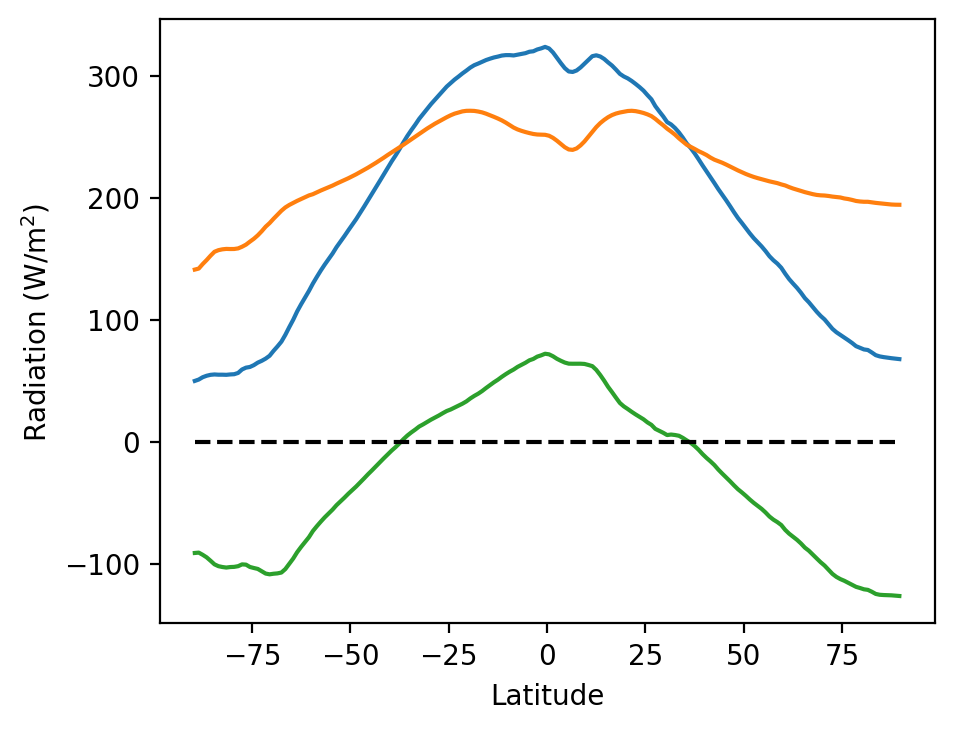

In [9]:
# Plot of net TOA SWR
# After plot in Hartmann lecture notes: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiNx4GcvZ_zAhVsTd8KHYuyAvIQFnoECB4QAQ&url=https%3A%2F%2Fwww.atmos.washington.edu%2F~dennis%2F321%2F321_Lecture_5.pdf&usg=AOvVaw247yEufQgbqksnBY0Elu7O
fig = plt.figure()
plt.plot(ds.lat,np.mean(np.mean(ds.solar_clim-ds.toa_sw_all_clim,0),1))
plt.plot(ds.lat,np.mean(np.mean(ds.toa_lw_all_clim,0),1))
plt.plot(ds.lat,np.mean(np.mean(ds.solar_clim-ds.toa_sw_all_clim-ds.toa_lw_all_clim,0),1))
plt.plot(ds.lat,0*np.mean(np.mean(ds.toa_lw_all_clim,0),1),'k--')
plt.ylabel('Radiation (W/m$^2$)')
plt.xlabel('Latitude')

# To do W instead of W/m^2, should be proportional to multiplying above by *np.cos(ds.lat*np.pi/180)

if savefig:
    plt.savefig(__figdir__+'TOA_SW_radiation_net..'+plotfiletype,**savefig_args)


C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


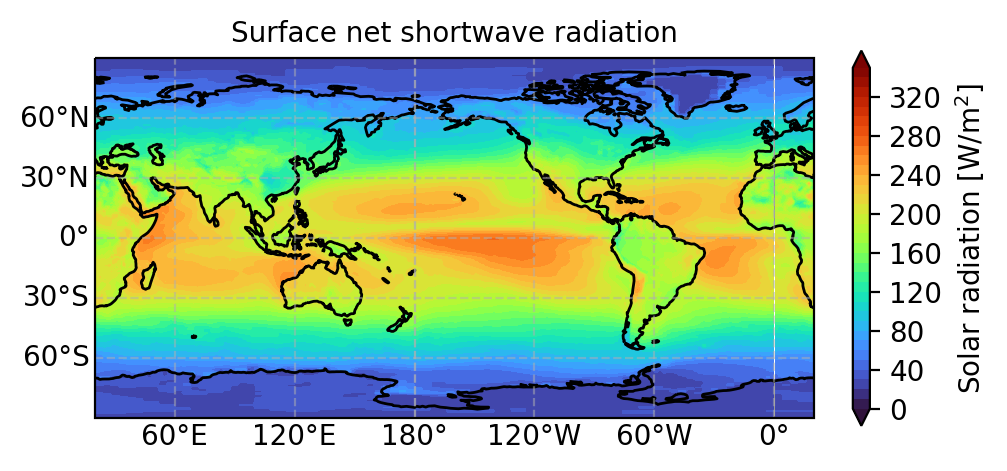

In [10]:
# sfc_net_sw_all_clim
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Surface net shortwave radiation',size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor=[.6,.6,.6], edgecolor='black')
levels = np.linspace(0,350,36)
cs = ax.contourf(ds.lon,ds.lat,np.mean(ds.sfc_net_sw_all_clim,0), levels,  extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022)
cb.set_label('Solar radiation [W/m$^2$]',fontsize = 10)


if savefig:
    plt.savefig(__figdir__+'Surface_SW_radiation_net..'+plotfiletype,**savefig_args)
